In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold 
from sklearn.feature_selection import SelectKBest
from  sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder


In [2]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
targets = pd.read_csv('target.csv')
data = pd.concat([numerical, categorical, targets], axis = 1)
data['TARGET_B'].value_counts()
data

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3

## First, check the model with any treatment on data

In [3]:
y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1) 

In [4]:
# Note: we need to do train/test split before downsampling, and then only downsample the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(76329, 338)
(19083, 338)
(76329,)
(19083,)


In [5]:
# Splitting data in categorical and numerical
numericalX_train   = X_train.select_dtypes(np.number)
numericalX_test    = X_test.select_dtypes(np.number)
categoricalX_train = X_train.select_dtypes(object) 
categoricalX_test  = X_test.select_dtypes(object) 

In [6]:
# OneHotEncode 
#categoricalX_train encoding
encoder = OneHotEncoder(drop='first').fit(categoricalX_train)
encoded_categorical_train = encoder.transform(categoricalX_train).toarray()
encoded_categorical_train = pd.DataFrame(encoded_categorical_train, columns=encoder.get_feature_names_out()) # needed to avoid error
#categoricalX_test encoding
encoded_categorical_test = encoder.transform(categoricalX_test).toarray()
encoded_categorical_test = pd.DataFrame(encoded_categorical_test, columns=encoder.get_feature_names_out())

In [7]:
# Scaling
#numericalX_train scaling
transformer = MinMaxScaler().fit(numericalX_train)
scaled_numerical_train = transformer.transform(numericalX_train)
scaled_numerical_train = pd.DataFrame(scaled_numerical_train, columns=numericalX_train.columns)
#numericalX_test scaling
scaled_numerical_test  = transformer.transform(numericalX_test)
scaled_numerical_test  = pd.DataFrame(scaled_numerical_test, columns=numericalX_train.columns)

In [8]:
#Concatenating both dataframes for train and test post scalling and onehotencoding
X_train_treated = pd.concat([scaled_numerical_train, encoded_categorical_train], axis = 1)
X_test_treated  = pd.concat([scaled_numerical_test,  encoded_categorical_test],  axis = 1)

In [9]:
print(X_train_treated.shape)
print(X_test_treated.shape)
print(y_train.shape)
print(y_test.shape)

(76329, 355)
(19083, 355)
(76329,)
(19083,)


In [10]:
# Now we can remove the column target d from the set of features
X_train_treated = X_train_treated.drop(['TARGET_D'], axis = 1)
X_test_treated = X_test_treated.drop(['TARGET_D'], axis = 1)

In [11]:
clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(X_train_treated, y_train)
print(clf.score(X_train_treated, y_train))
print(clf.score(X_test_treated, y_test))

y_pred = clf.predict(X_test_treated)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.9496521636599458
0.9475973379447676


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[18083,     0],
       [ 1000,     0]], dtype=int64)

## Now let's check the model dealing with the imbalance (but not feature selection)

In [12]:
trainset = pd.concat([X_train_treated, y_train.reset_index(drop=True)], axis=1)
trainset['TARGET_B'].value_counts()

0    72486
1     3843
Name: TARGET_B, dtype: int64

In [13]:
trainset.shape

(76329, 355)

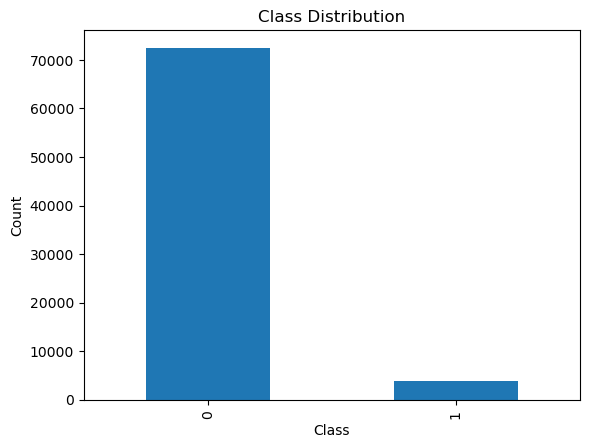

In [14]:
# Plotting class distribution
y_train.value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [15]:
trainset = pd.concat([X_train_treated, y_train.reset_index(drop=True)], axis=1)
category_1_upsampled = trainset[trainset['TARGET_B'] == 1].sample(len(trainset[trainset['TARGET_B'] == 0]), replace=True)
print(category_1_upsampled.shape)
category_0 = trainset[trainset['TARGET_B'] == 0]
print(category_0.shape)
# Concatenate the upsampled category 1 with category 0
trainset_new_upsampled = pd.concat([category_0, category_1_upsampled], axis=0)
trainset_new_upsampled = trainset_new_upsampled.sample(frac=1)  # randomize the rows
X_train_treated_upsampled = trainset_new_upsampled.drop(['TARGET_B'], axis=1)
y_train_upsampled = trainset_new_upsampled['TARGET_B']

(72486, 355)
(72486, 355)


In [16]:
print(X_train_treated_upsampled.shape)
print(X_test_treated.shape)
print(y_train_upsampled.shape)
print(y_test.shape)

(144972, 354)
(19083, 354)
(144972,)
(19083,)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(X_train_treated_upsampled, y_train_upsampled)
print(clf.score(X_train_treated_upsampled, y_train_upsampled))
print(clf.score(X_test_treated, y_test))
y_pred = clf.predict(X_test_treated)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.6226650663576415
0.6005869098150186


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[10901,  7182],
       [  440,   560]], dtype=int64)

In [18]:
X_test_treated_2 = X_test_treated
X_test_treated_2

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.000483,0.659794,0.833333,1.000000,0.000000,0.000000,0.242424,0.424242,0.222222,0.090909,0.020202,0.011494,1.000000,0.107142,0.137114,0.126825,0.989899,0.000000,0.020202,0.474747,0.535354,0.909091,0.020202,0.010101,0.040404,0.090909,0.0,0.013889,0.010101,0.014925,0.000000,0.0,0.000000,0.051546,0.000000,0.012346,0.023256,0.416667,0.500000,0.535714,0.464286,0.559524,0.595238,0.266667,0.474747,0.363636,0.171717,0.090909,0.252525,0.191919,0.121212,0.111111,0.131313,0.121212,0.222222,0.181818,0.313131,0.171717,0.121212,0.333333,0.151515,0.313131,0.262626,0.404040,0.333333,0.181818,0.060606,0.020202,0.636364,0.101010,0.123288,0.181818,0.244615,0.335714,0.656566,0.343434,0.014286,0.272727,0.262626,0.121212,0.000000,0.000000,0.000000,0.325500,0.359167,0.615385,0.615385,0.878788,0.131313,0.939394,0.070707,0.020202,0.272727,0.686869,0.595960,0.232323,0.828283,0.181818,0.040404,0.02,0.030303,0.141414,0.232323,0.060606,0.200000,0.525253,0.232323,0.023256,0.010101,0.000000,0.474747,0.757576,0.898990,0.949495,1.000000,0.101010,0.020202,0.404040,0.600000,0.588889,0.213115,0.100,0.252525,0.020202,0.070707,0.040404,0.020202,0.060606,0.010101,0.888889,0.909091,0.939394,0.949495,0.478632,0.019969,0.911464,0.302667,0.350667,0.318667,0.376000,0.124150,0.151515,0.131313,0.121212,0.161616,0.282828,0.090909,0.04,0.032787,0.020202,0.040404,0.111111,0.111111,0.181818,0.353535,0.121212,0.08,0.020202,0.020202,0.333333,0.030303,0.525253,0.040404,0.616162,0.393939,0.070707,0.808081,0.141414,0.010101,0.010101,0.0,0.000000,0.04,0.010101,0.030303,0.000000,0.030303,0.366667,0.486842,0.151515,0.727273,0.646465,0.767677,0.545455,0.727273,0.515152,0.646465,0.454545,0.989899,0.79798,0.020202,0.171717,0.181818,0.040404,0.161616,0.191919,0.000000,0.072727,0.050505,0.010101,0.090909,0.030303,0.014286,0.030303,0.020202,0.000000,0.050505,0.232323,0.033333,0.062500,0.050505,0.141

## Now let's deal with feature selection (with original data)

In [19]:
numerical

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,5,7,6,0,11,33,4,3,2,12,3,3

In [20]:
#numerical scaling
transformer = MinMaxScaler().fit(numerical)
numerical_scaled = transformer.transform(numerical)
numerical_scaled = pd.DataFrame(numerical_scaled, columns=numerical.columns)
#Check my scaled numerical
numerical_scaled

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0.000000,0.608247,0.666667,1.000000,0.000000,0.000000,0.393939,0.343434,0.181818,0.101010,0.020202,0.011494,0.555556,0.010051,0.011108,0.009378,0.000000,0.353535,0.656566,0.474747,0.535354,0.929293,0.010101,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.113402,0.000000,0.000000,0.000000,0.464286,0.571429,0.607143,0.476190,0.595238,0.642857,0.333333,0.313131,0.424242,0.272727,0.111111,0.141414,0.181818,0.171717,0.131313,0.111111,0.151515,0.121212,0.111111,0.343434,0.252525,0.181818,0.262626,0.101010,0.232323,0.181818,0.333333,0.494949,0.282828,0.121212,0.040404,0.616162,0.070707,0.164384,0.191919,0.304615,0.394286,0.979798,0.959596,0.020202,0.020202,0.000000,0.000000,0.070707,0.070707,0.000000,0.079833,0.105833,0.230769,0.153846,0.868687,0.141414,0.969697,0.040404,0.070707,0.383838,0.808081,0.707071,0.323232,0.848485,0.161616,0.060606,0.04,0.050505,0.090909,0.151515,0.030303,0.226667,0.505051,0.252525,0.000000,0.000000,0.000000,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.010101,0.616162,0.682353,0.677778,0.245902,0.100,0.020202,0.000000,0.000000,0.141414,0.010101,0.000000,0.000000,0.020202,0.050505,0.171717,0.737374,0.000000,0.271889,0.774120,0.204667,0.212000,0.232667,0.252000,0.073818,0.131313,0.232323,0.232323,0.232323,0.151515,0.010101,0.00,0.000000,0.010101,0.040404,0.252525,0.242424,0.262626,0.171717,0.020202,0.00,0.000000,0.020202,0.282828,0.040404,0.515152,0.010101,0.464646,0.545455,0.030303,0.888889,0.080808,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.040404,0.010101,0.131313,0.155556,0.210526,0.020202,0.454545,0.565657,0.646465,0.505051,0.646465,0.444444,0.626263,0.535354,1.000000,0.000000,0.000000,0.090909,0.030303,0.080808,0.131313,0.090909,0.000000,0.054545,0.090909,0.030303,0.151515,0.191919,0.050505,0.040404,0.030303,0.000000,0.030303,0.414141,0.010101,0.000000,0.070707,0.131313,0.060606,0.050505,0.000000,0.059701,0.090909,0.040404,0.010101,0.030303,0.101010,0.020202,0.010101,0.070707,0.787879,0.020202,0.000000,0.705882,0.161616,0.101010,0.393939,0.212121,0.216216,0.040404,0.030303,0.051546,0.202020,0.100000,0.263889,0.040404,0.000000,0.000000,0.000000,0.181818,0.393939,0.000000,0.343434,0.232323,0.181818,0.161616,0.012048,0.040404,0.000000,0.250000,0.000000,0.000000,0

In [21]:
#  Variance Threshold

In [22]:
var_threshold = 0.02
sel = VarianceThreshold(threshold=(var_threshold))

# 1) default is threshold = 0 :eliminate all coumns that are identical for all rows
# 2) in practice we would scale the columns first, and then apply threshold, or apply 
#    a different threshold for different columns

# This drops the columns that have a variance less than this threshold
sel = sel.fit(numerical_scaled)
temp = sel.transform(numerical_scaled)
temp = pd.DataFrame(temp)
print(numerical_scaled.shape)
print(temp.shape)

(95412, 315)
(95412, 79)


In [23]:
#This gives you the result as True and False for the columns that we
# selected and those which were removed, respectively.
sel.variances_ > var_threshold
sel.get_support()
var_list = list(sel.get_support())
var_list

[False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,

In [24]:
list(zip(numerical.columns, var_list))

[('TCODE', False),
 ('AGE', True),
 ('INCOME', True),
 ('WEALTH1', True),
 ('HIT', False),
 ('MALEMILI', False),
 ('MALEVET', False),
 ('VIETVETS', True),
 ('WWIIVETS', True),
 ('LOCALGOV', False),
 ('STATEGOV', False),
 ('FEDGOV', False),
 ('WEALTH2', True),
 ('POP901', False),
 ('POP902', False),
 ('POP903', False),
 ('POP90C1', True),
 ('POP90C2', True),
 ('POP90C3', True),
 ('POP90C4', False),
 ('POP90C5', False),
 ('ETH1', True),
 ('ETH2', True),
 ('ETH3', False),
 ('ETH4', False),
 ('ETH5', False),
 ('ETH6', False),
 ('ETH7', False),
 ('ETH8', False),
 ('ETH9', False),
 ('ETH10', False),
 ('ETH11', False),
 ('ETH12', False),
 ('ETH13', False),
 ('ETH14', False),
 ('ETH15', False),
 ('ETH16', False),
 ('AGE901', False),
 ('AGE902', False),
 ('AGE903', False),
 ('AGE904', False),
 ('AGE905', False),
 ('AGE906', False),
 ('AGE907', False),
 ('CHIL1', False),
 ('CHIL2', False),
 ('CHIL3', False),
 ('AGEC1', False),
 ('AGEC2', False),
 ('AGEC3', False),
 ('AGEC4', False),
 ('AGEC5', F

In [25]:
removed_columns = pd.DataFrame(data=(numerical.columns,sel.variances_,sel.get_support()), index=('column_name','variance','statement')).T
collist = removed_columns.loc[(removed_columns['statement'] == False),:]

collist = collist['column_name'].tolist()
print(collist)

['TCODE', 'HIT', 'MALEMILI', 'MALEVET', 'LOCALGOV', 'STATEGOV', 'FEDGOV', 'POP901', 'POP902', 'POP903', 'POP90C4', 'POP90C5', 'ETH3', 'ETH4', 'ETH5', 'ETH6', 'ETH7', 'ETH8', 'ETH9', 'ETH10', 'ETH11', 'ETH12', 'ETH13', 'ETH14', 'ETH15', 'ETH16', 'AGE901', 'AGE902', 'AGE903', 'AGE904', 'AGE905', 'AGE906', 'AGE907', 'CHIL1', 'CHIL2', 'CHIL3', 'AGEC1', 'AGEC2', 'AGEC3', 'AGEC4', 'AGEC5', 'AGEC6', 'AGEC7', 'CHILC1', 'CHILC2', 'CHILC3', 'CHILC4', 'CHILC5', 'HHAGE1', 'HHAGE2', 'HHAGE3', 'HHN1', 'HHN2', 'HHN4', 'HHN5', 'HHN6', 'MARR1', 'MARR2', 'MARR3', 'MARR4', 'HHP1', 'HHP2', 'DW3', 'DW7', 'DW8', 'DW9', 'HU3', 'HU4', 'HHD1', 'HHD4', 'HHD6', 'HHD7', 'HHD8', 'HHD9', 'HHD10', 'HHD11', 'HHD12', 'ETHC1', 'ETHC3', 'ETHC4', 'ETHC5', 'ETHC6', 'HUR1', 'RHP1', 'RHP2', 'RHP3', 'RHP4', 'HUPA1', 'HUPA4', 'HUPA5', 'HUPA7', 'DMA', 'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'IC7', 'IC8', 'IC9', 'IC10', 'IC11', 'IC12', 'IC13', 'IC14', 'IC15', 'IC16', 'IC17', 'IC18', 'IC19', 'IC20', 'IC21', 'IC22', 'IC23', 'HHAS1', '

In [26]:
# now we would want to double check the correlation for each of these with the TARGET_D
for col in collist:
    if targets['TARGET_D'].corr(numerical[col]) > 0.03:
        print(targets['TARGET_D'].corr(numerical[col]), col)

0.03178008207908702 IC1
0.03549556453606052 IC2
0.03378590650214991 IC3
0.035951880908995586 IC4
0.03732751334743974 IC5
0.03116720842530487 EC8
0.044810106092751184 RAMNTALL
0.03922375093823322 MAXRAMNT
0.061678445759005385 LASTGIFT
0.04429908407703822 AVGGIFT


In [27]:
temp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
0,0.608247,0.666667,1.000000,0.343434,0.181818,0.555556,0.000000,0.353535,0.656566,0.929293,0.010101,0.494949,0.979798,0.959596,0.020202,0.000000,0.000000,0.079833,0.105833,0.230769,0.153846,0.868687,0.141414,0.070707,0.808081,0.707071,0.848485,0.505051,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.616162,0.000000,0.000000,0.000000,0.020202,0.050505,0.171717,0.737374,0.000000,0.271889,0.131313,0.515152,0.464646,0.545455,0.131313,0.454545,0.646465,0.646465,0.626263,0.535354,1.000000,0.000000,0.343434,0.181818,0.747475,0.888889,0.777778,0.596154,0.141414,0.141414,0.313131,0.545455,0.464646,0.909091,0.101010,0.333333,0.656566,0.404040,0.285714,0.4,0.433333,0.498045,0.0,1.000000,0.622951
1,0.463918,0.833333,1.000000,0.555556,0.111111,1.000000,1.000000,0.000000,0.000000,0.676768,0.000000,0.757576,1.000000,1.000000,0.000000,0.000000,0.000000,0.911333,0.869667,0.923077,0.769231,0.969697,0.040404,0.090909,0.949495,0.888889,0.959596,0.444444,0.979798,0.989899,0.989899,0.989899,1.000000,0.949495,0.838384,0.000000,0.000000,0.000000,0.919192,0.919192,0.919192,0.949495,0.478632,0.019969,0.020202,0.666667,0.565657,0.444444,0.020202,0.717172,0.838384,0.818182,0.646465,0.575758,1.000000,1.000000,0.555556,0.111111,0.393939,0.505051,0.929293,0.192308,0.262626,0.565657,0.979798,1.000000,0.000000,0.969697,0.040404,1.000000,0.000000,1.000000,0.952381,0.8,0.183333,0.774510,0.0,0.333333,0.000000
2,0.624862,0.333333,0.111111,0.292929,0.333333,0.111111,0.000000,0.020202,0.989899,0.969697,0.020202,0.444444,0.696970,0.696970,0.060606,0.050505,0.030303,0.082833,0.091000,0.153846,0.076923,0.787879,0.222222,0.181818,0.767677,0.656566,0.868687,0.606061,0.000000,0.010101,0.060606,0.181818,0.505051,0.000000,0.363636,0.020202,0.242424,0.030303,0.000000,0.020202,0.090909,0.444444,0.000000,0.431644,0.323232,0.313131,0.383838,0.626263,0.212121,0.616162,0.737374,0.707071,0.787879,0.626263,0.828283,1.000000,0.282828,0.323232,0.848485,0.969697,0.656566,0.423077,0.121212,0.232323,0.505051,0.696970,0.313131,0.000000,0.353535,0.222222,0.777778,0.171717,0.428571,0.4,0.416667,0.078617,1.0,1.000000,0.967213
3,0.711340,0.000000,0.444444,0.141414,0.313131,0.000000,0.000000,0.080808,0.929293,0.616162,0.000000,0.505051,0.858586,0.838384,0.040404,0.010101,0.000000,0.166667,0.210500,0.153846,0.076923,0.484848,0.525253,0.060606,0.737374,0.616162,0.848485,0.363636,0.101010,0.252525,0.505051,0.696970,0.929293,0.101010,0.424242,0.000000,0.090909,0.000000,0.010101,0.080808,0.171717,0.343434,0.997863,0.102919,0.272727,0.262626,0.464646,0.545455,0.171717,0.434343,0.818182,0.686869,0.333333,0.313131,0.000000,1.000000,0.141414,0.313131,0.676768,0.565657,0.434343,0.730769,0.101010,0.191919,0.393939,0.454545,0.555556,0.454545,0.171717,0.232323,0.777778,0.222222,0.761905,0.4,0.433333,0.899764,1.0,1.000000,0.655738
4,0.793814,0.333333,0.222222,0.090909,0.535354,1.000000,1.000000,0.000000,0.000000,0.020202,0.989899,0.575758,1.000000,0.989899,0.000000,0.000000,0.000000,0.096000,0.099000,0.307692,0.230769,0.909091,0.101010,0.000000,0.828283,0.494949,0.929293,0.010101,0.000000,0.010101,0.020202,0.161616,0.676768,0.000000,0.454545,0.000000,0.000000,0.000000,0.252525,0.585859,0.747475,0.838384,0.534188,0.195084,0.242424,0.111111,0.202020,0.808081,0.010101,0.767677,0.737374,0.656566,0.808081,0.313131,0.818182,1.000000,0.090909,0.535354,0.656566,1.000000,0.454545,0.653846,0.010101,0.030303,0.060606,0.333333,0.676768,0.090909,0.727273,1.000000,0.010101,0.212121,0.285714,0.4,0.700000,0.037079,1.0,0.333333,0.409836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [28]:
# Random Forests are generally robust to irrelevant features and can handle correlated features to some extent.
# The nature of decision trees in a Random Forest allows them to naturally select important features.
# Using VarianceThreshold might not be as critical for Random Forests, as they can handle a certain degree of feature redundancy.

In [29]:
# SelectKBest

In [30]:
X = numerical_scaled
y = targets['TARGET_B']


kbest = SelectKBest(chi2, k=50).fit_transform(X, y)
# Here we choose 10 so that is easier to analyze results later, as we will see
num_kbest = pd.DataFrame(kbest)
num_kbest.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.666667,0.010101,0.079833,0.105833,0.230769,0.153846,0.070707,0.000000,0.000000,0.000000,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.020202,0.050505,0.171717,0.000000,0.212000,0.252000,0.131313,0.010101,0.010101,0.040404,0.00,0.020202,0.515152,0.010101,0.000000,0.000000,0.161616,0.040404,0.030303,0.161616,0.747475,0.141414,0.313131,0.545455,0.464646,0.0,0.285714,0.433333,0.366492,0.127119,0.341463,0.498045,1.000000,0.622951
1,0.833333,0.000000,0.911333,0.869667,0.923077,0.769231,0.090909,0.000000,0.000000,0.000000,0.979798,0.989899,0.989899,0.989899,1.000000,0.949495,0.919192,0.919192,0.919192,0.478632,0.730667,0.691333,0.020202,0.141414,0.333333,0.020202,0.28,0.323232,0.666667,0.030303,0.000000,0.000000,0.050505,0.303030,0.202020,0.000000,0.393939,0.565657,0.979798,1.000000,0.000000,0.0,0.952381,0.183333,0.146597,0.008475,0.024390,0.774510,0.333333,0.000000
2,0.333333,0.020202,0.082833,0.091000,0.153846,0.076923,0.181818,0.000000,0.010101,0.000000,0.000000,0.010101,0.060606,0.181818,0.505051,0.000000,0.000000,0.020202,0.090909,0.000000,0.194667,0.226667,0.323232,0.020202,0.010101,0.202020,0.00,0.010101,0.313131,0.111111,0.000000,0.000000,0.222222,0.050505,0.030303,0.080808,0.848485,0.232323,0.505051,0.696970,0.313131,0.0,0.428571,0.416667,0.308901,0.110169,0.341463,0.078617,1.000000,0.967213
3,0.000000,0.000000,0.166667,0.210500,0.153846,0.076923,0.060606,0.000000,0.000000,0.000000,0.101010,0.252525,0.505051,0.696970,0.929293,0.101010,0.010101,0.080808,0.171717,0.997863,0.258667,0.282000,0.272727,0.050505,0.040404,0.353535,0.00,0.050505,0.262626,0.202020,0.000000,0.000000,0.282828,0.030303,0.050505,0.161616,0.676768,0.191919,0.393939,0.454545,0.555556,0.0,0.761905,0.433333,0.324607,0.063559,0.170732,0.899764,1.000000,0.655738
4,0.333333,0.989899,0.096000,0.099000,0.307692,0.230769,0.000000,0.381818,0.585859,0.191919,0.000000,0.010101,0.020202,0.161616,0.676768,0.000000,0.252525,0.585859,0.747475,0.534188,0.166667,0.214000,0.242424,0.040404,0.020202,0.212121,0.00,0.030303,0.111111,0.141414,0.010101,0.010101,0.161616,0.121212,0.050505,0.202020,0.656566,0.030303,0.060606,0.333333,0.676768,0.0,0.285714,0.700000,0.570681,0.152542,0.195122,0.037079,0.333333,0.409836


In [31]:
# To check the scores
model = SelectKBest(chi2, k=50).fit(X, y)
df = pd.DataFrame(data = model.scores_, columns = ['score'])
df['Column'] = numerical.columns
print(df.sort_values(by = ['score'], ascending = False).head(50))

          score    Column
313  210.290810    RFA_2F
305   27.516508  CARDGIFT
110   26.474583      HVP1
111   25.757492      HVP2
112   21.545080      HVP3
115   19.261394      HVP6
113   14.874056      HVP4
22    13.034181      ETH2
129   12.581538       RP1
130   11.022637       RP2
304    8.909015  NGIFTALL
83     8.309269       HV1
84     8.260178       HV2
108    7.470098     ETHC5
107    7.224822     ETHC4
299    7.083556  CARDPROM
300    6.744744   NUMPROM
131    5.622626       RP3
114    5.545304      HVP5
314    4.838850  CLUSTER2
2      3.992481    INCOME
86     3.847846       HV4
85     3.772977       HV3
150    2.894568      IC15
133    2.873016       MSA
158    2.838548      IC23
311    2.751733  CONTROLN
162    2.713679     HHAS4
161    2.675815     HHAS3
279    2.508204       HC6
266    2.472344     POBC2
149    2.434518      IC14
295    2.311554     MHUC1
281    2.167060       HC8
233    2.058735       EC7
156    1.991555      IC21
137    1.947578       IC2
141    1.946

In [32]:
cols = df.sort_values(by = ['score'], ascending = False).head(50)['Column']
cols

313      RFA_2F
305    CARDGIFT
110        HVP1
111        HVP2
112        HVP3
115        HVP6
113        HVP4
22         ETH2
129         RP1
130         RP2
304    NGIFTALL
83          HV1
84          HV2
108       ETHC5
107       ETHC4
299    CARDPROM
300     NUMPROM
131         RP3
114        HVP5
314    CLUSTER2
2        INCOME
86          HV4
85          HV3
150        IC15
133         MSA
158        IC23
311    CONTROLN
162       HHAS4
161       HHAS3
279         HC6
266       POBC2
149        IC14
295       MHUC1
281         HC8
233         EC7
156        IC21
137         IC2
141         IC6
91          HU5
168        TPE3
139         IC4
228         EC2
234         EC8
109       ETHC6
249         VC4
278         HC5
169        TPE4
146        IC11
280         HC7
282         HC9
Name: Column, dtype: object

In [33]:
# Let's check correlation to decide what I kept

In [34]:
# Multicollinearity
numerical_data = pd.concat([numerical[cols], targets['TARGET_B']], axis=1)
corr = numerical_data.corr()
corr
health_best = corr.sort_values(by = 'TARGET_B', ascending=False)
health_best['TARGET_B']

TARGET_B    1.000000
RFA_2F      0.072311
CARDGIFT    0.054027
NGIFTALL    0.050896
NUMPROM     0.033161
CARDPROM    0.032467
HV2         0.025607
HV1         0.025012
HVP4        0.024186
HVP3        0.024175
HVP2        0.023514
HVP1        0.022948
HVP5        0.022034
IC4         0.020535
HHAS3       0.020252
HV3         0.020191
HV4         0.020085
RP2         0.019928
HVP6        0.019869
IC2         0.019828
RP1         0.019158
MHUC1       0.018195
RP3         0.017939
EC7         0.017818
IC11        0.016961
INCOME      0.016508
EC8         0.016443
IC14        0.014884
IC23        0.014821
IC21        0.013339
CONTROLN    0.013165
MSA         0.011018
HC6         0.010803
HC7         0.010363
HC9         0.008515
HC5         0.008399
HU5         0.007898
HC8        -0.009124
TPE3       -0.012178
TPE4       -0.012396
VC4        -0.013304
ETHC6      -0.013369
IC6        -0.014362
EC2        -0.015423
CLUSTER2   -0.016390
IC15       -0.017081
HHAS4      -0.017448
POBC2      -0

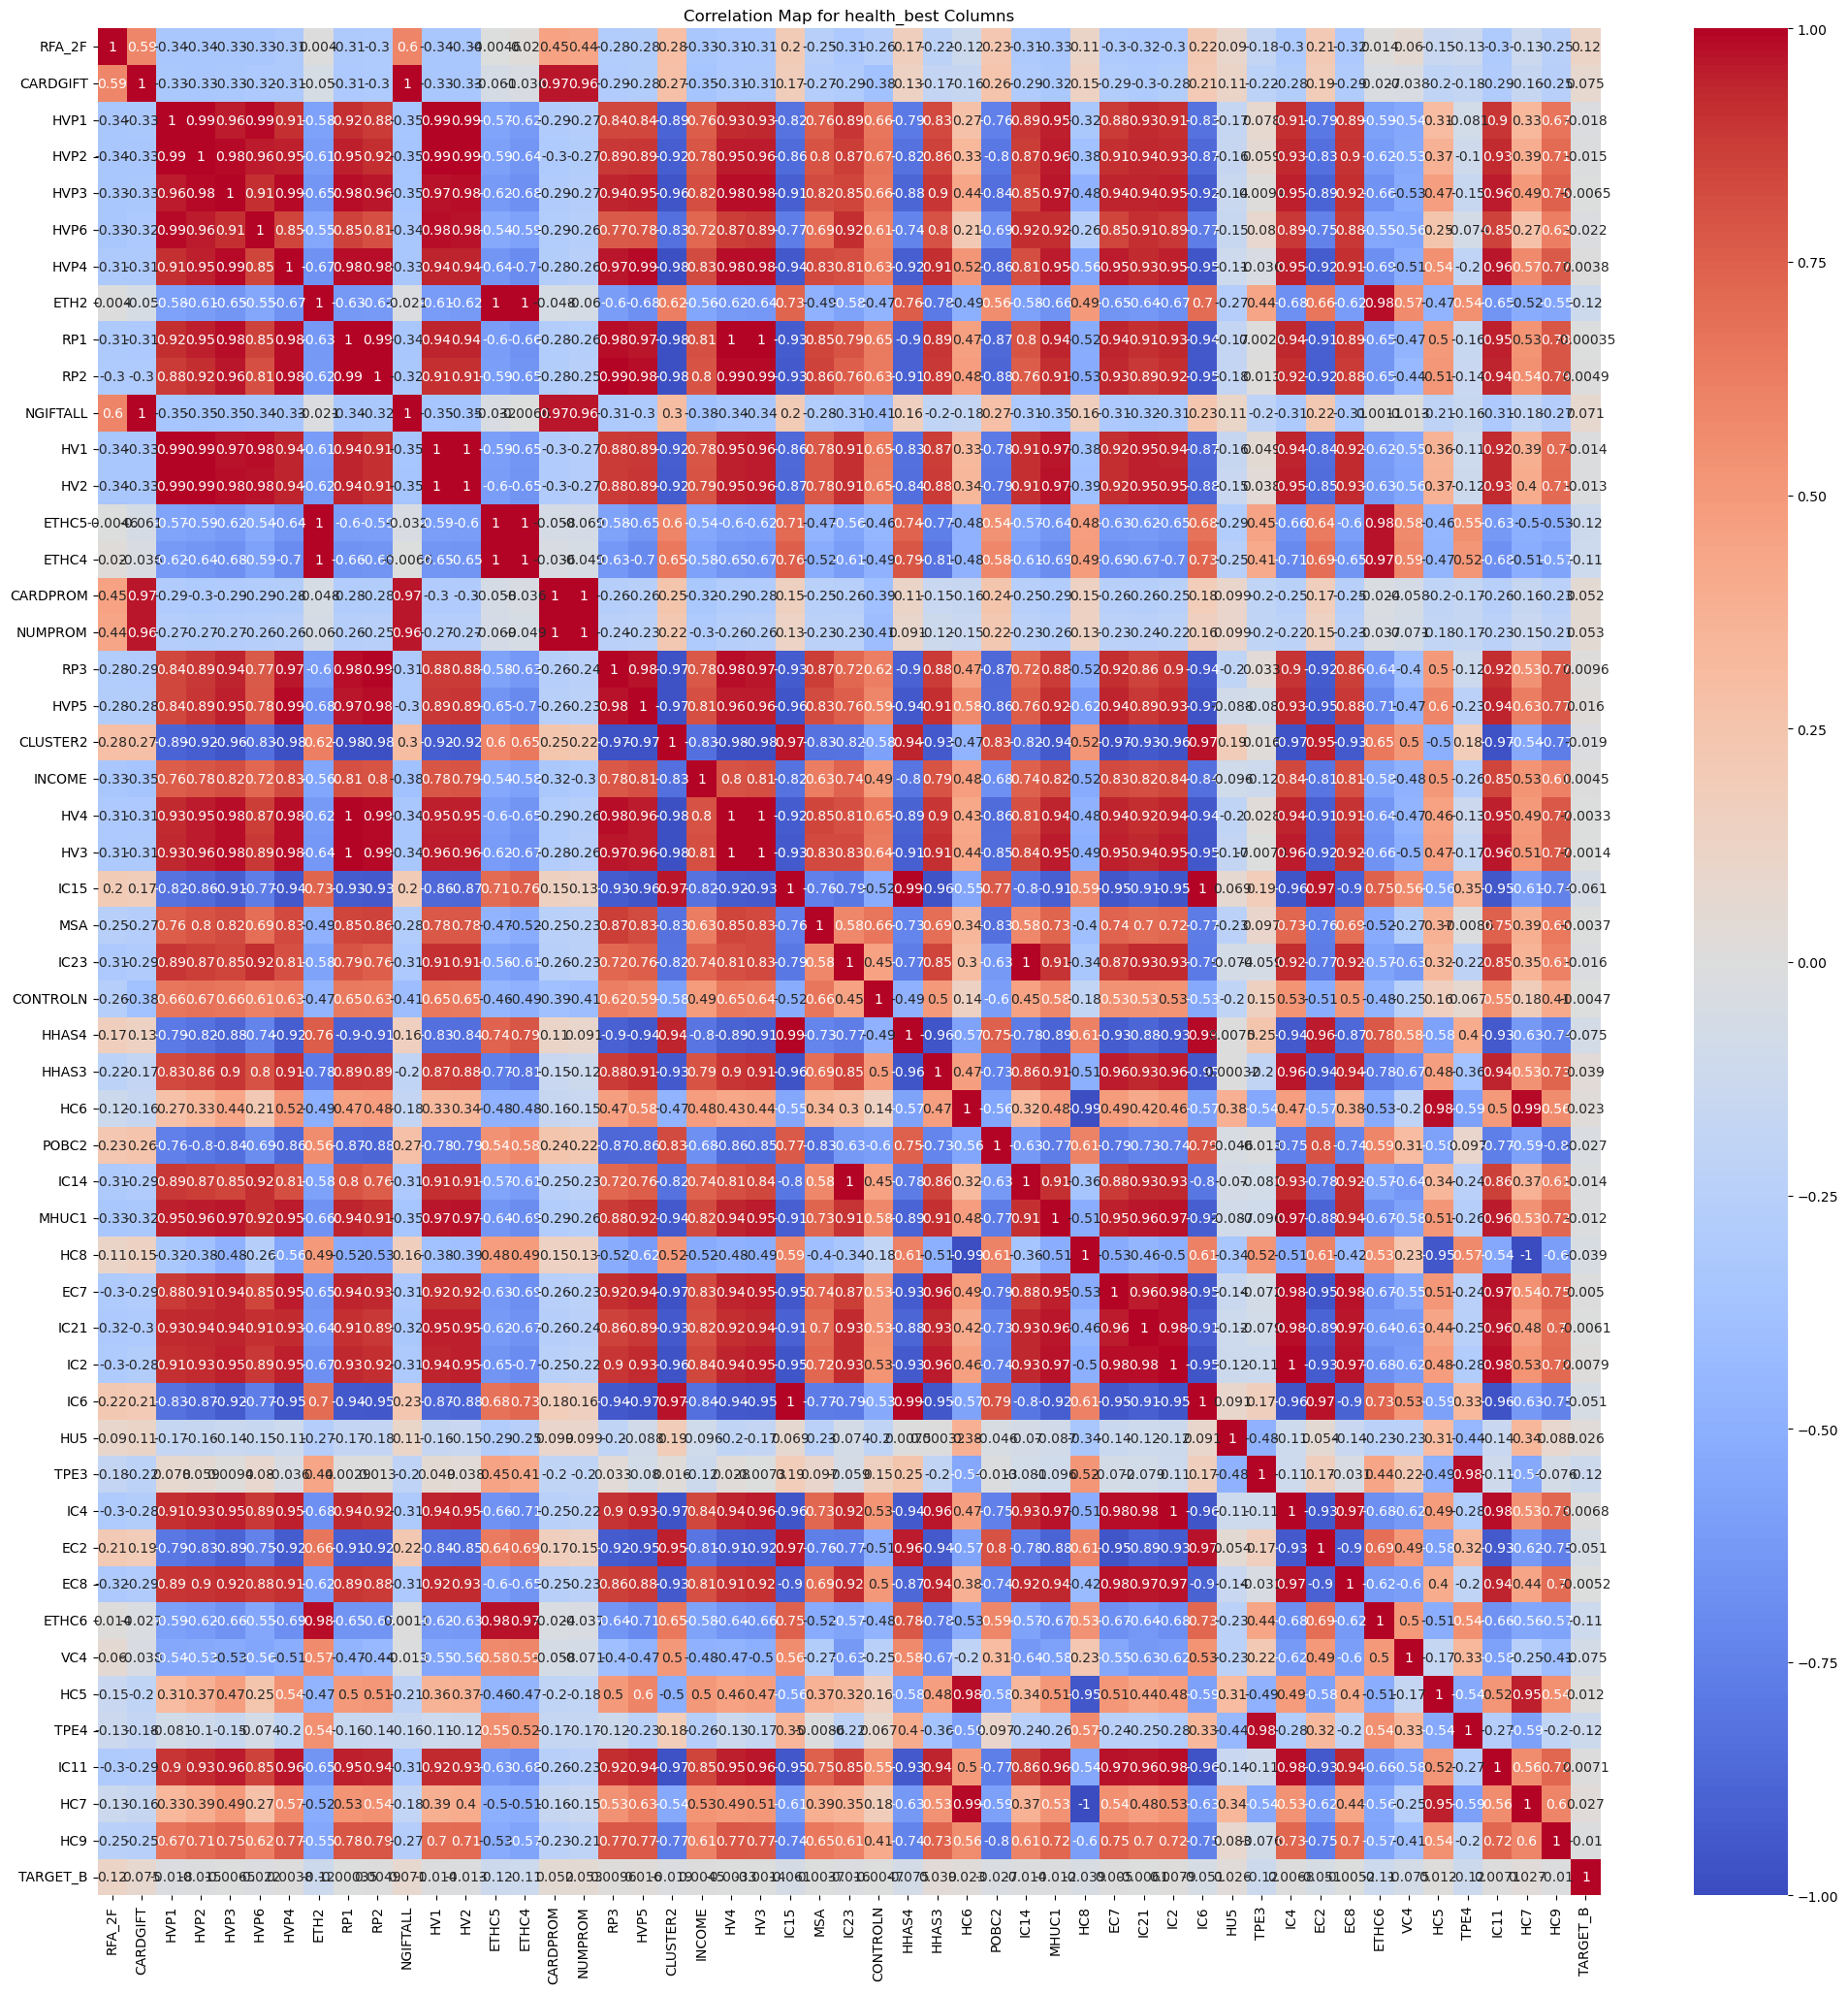

In [35]:
# Display the correlation map for all columns in health_best
plt.figure(figsize=(25, 25))
sns.heatmap(health_best.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Map for health_best Columns')
plt.show()


In [36]:
data = {'COLUMN': ['RFA_2F', 'CARDGIFT', 'NGIFTALL', 'NUMPROM', 'CARDPROM', 'HV2', 'HV1', 'HVP4', 'HVP3', 'HVP2', 'HVP1', 'HVP5', 'IC4', 'HHAS3', 'HV3', 'HV4', 'RP2', 'ETHC4', 'HVP6', 'IC2', 'RP1', 'ETH2', 'ETHC5', 'MHUC1', 'RP3', 'EC7', 'POBC2', 'HHAS4', 'IC15', 'IC11', 'INCOME', 'EC8', 'CLUSTER2', 'EC2', 'IC14', 'IC23', 'IC6', 'ETHC6', 'IC21', 'VC4', 'CONTROLN', 'TPE4', 'TPE3', 'MSA', 'HC6', 'HC7', 'HC8', 'HC9', 'HC5', 'HU5'], 
        'VALUE': [0.072311, 0.054027, 0.050896, 0.033161, 0.032467, 0.025607, 0.025012, 0.024186, 0.024175, 0.023514, 0.022948, 0.022034, 0.020535, 0.020252, 0.020191, 0.020085, 0.019928, 0.019885, 0.019869, 0.019828, 0.019158, 0.019040, 0.018689, 0.018195, 0.017939, 0.017818, 0.017562, 0.017448, 0.017081, 0.016961, 0.016508, 0.016443, 0.016390, 0.015423, 0.014884, 0.014821, 0.014362, 0.013369, 0.013339, 0.013304, 0.013165, 0.012396, 0.012178, 0.011018, 0.010803, 0.010363, 0.009124, 0.008515, 0.008399, 0.007898]}

In [37]:
df = pd.DataFrame(data)

# Extract prefixes before the numeric part
df['Prefix'] = df['COLUMN'].str.extract(r'([a-zA-Z]+)')

# Create a dictionary to store the selected columns
selected_columns = {}

# Iterate through the DataFrame
for index, row in df.iterrows():
    column = row['COLUMN']
    prefix = row['Prefix']
    value = row['VALUE']
    
    # Check if the prefix is already in the selected columns dictionary
    if prefix not in selected_columns:
        selected_columns[prefix] = {'COLUMN': column, 'VALUE': value}
    else:
        # Compare values and keep the column with the higher value
        if value > selected_columns[prefix]['VALUE']:
            selected_columns[prefix] = {'COLUMN': column, 'VALUE': value}

# Create a new DataFrame with the selected columns
selected_df = pd.DataFrame(list(selected_columns.values()))

# Display the result
selected_df

,COLUMN,VALUE
0,RFA_2F,0.072311
1,CARDGIFT,0.054027
2,NGIFTALL,0.050896
3,NUMPROM,0.033161
4,CARDPROM,0.032467
5,HV2,0.025607
6,HVP4,0.024186
7,IC4,0.020535
8,HHAS3,0.020252
9,RP2,0.019928


In [38]:
selected_column_names = selected_df["COLUMN"].tolist()
selected_column_names

['RFA_2F',
 'CARDGIFT',
 'NGIFTALL',
 'NUMPROM',
 'CARDPROM',
 'HV2',
 'HVP4',
 'IC4',
 'HHAS3',
 'RP2',
 'ETHC4',
 'ETH2',
 'MHUC1',
 'EC7',
 'POBC2',
 'INCOME',
 'CLUSTER2',
 'VC4',
 'CONTROLN',
 'TPE4',
 'MSA',
 'HC6',
 'HU5']

In [39]:
numerical_sel = numerical[selected_column_names]
print(numerical_sel.shape)
numerical_sel.head()

(95412, 23)


,RFA_2F,CARDGIFT,NGIFTALL,NUMPROM,CARDPROM,HV2,HVP4,IC4,HHAS3,RP2,ETHC4,ETH2,MHUC1,EC7,POBC2,INCOME,CLUSTER2,VC4,CONTROLN,TPE4,MSA,HC6,HU5
0,4,14,31,74,27,635,27,378,51,5,0,1,6,4,74,5,39,16,95515,0,0.0,31,7
1,2,1,3,32,12,5218,98,1037,66,91,0,0,20,30,39,6,1,0,148535,0,4480.0,97,9
2,4,14,27,63,26,546,18,340,31,2,0,2,9,5,84,3,60,8,15078,0,0.0,50,18
3,4,7,16,66,27,1263,69,423,26,8,0,0,16,3,67,1,41,16,172556,0,9340.0,39,6
4,2,8,37,113,43,594,16,321,11,58,21,98,6,12,65,3,26,20,7112,1,5000.0,6,0


In [40]:
data = pd.concat([numerical_sel, categorical, targets], axis = 1)

In [41]:
y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
# Splitting data in categorical and numerical
numericalX_train   = X_train.select_dtypes(np.number)
numericalX_test    = X_test.select_dtypes(np.number)
categoricalX_train = X_train.select_dtypes(object) 
categoricalX_test  = X_test.select_dtypes(object) 

In [43]:
# OneHotEncode 
#categoricalX_train encoding
encoder = OneHotEncoder(drop='first').fit(categoricalX_train)
encoded_categorical_train = encoder.transform(categoricalX_train).toarray()
encoded_categorical_train = pd.DataFrame(encoded_categorical_train, columns=encoder.get_feature_names_out()) # needed to avoid error
#categoricalX_test encoding
encoded_categorical_test = encoder.transform(categoricalX_test).toarray()
encoded_categorical_test = pd.DataFrame(encoded_categorical_test, columns=encoder.get_feature_names_out())

In [44]:
# Scaling
#numericalX_train scaling
transformer = MinMaxScaler().fit(numericalX_train)
scaled_numerical_train = transformer.transform(numericalX_train)
scaled_numerical_train = pd.DataFrame(scaled_numerical_train, columns=numericalX_train.columns)
#numericalX_test scaling
scaled_numerical_test  = transformer.transform(numericalX_test)
scaled_numerical_test  = pd.DataFrame(scaled_numerical_test, columns=numericalX_train.columns)

In [45]:
#Concatenating both dataframes for train and test post scalling and onehotencoding
X_train_treated = pd.concat([scaled_numerical_train, encoded_categorical_train], axis = 1)
X_test_treated  = pd.concat([scaled_numerical_test,  encoded_categorical_test],  axis = 1)

In [46]:
# Now we can remove the column target d from the set of features
X_train_treated = X_train_treated.drop(['TARGET_D'], axis = 1)
X_test_treated = X_test_treated.drop(['TARGET_D'], axis = 1)
print(X_train_treated.shape)
print(X_test_treated.shape)
print(y_train.shape)
print(y_test.shape)

(76329, 62)
(19083, 62)
(76329,)
(19083,)


In [47]:
clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(X_train_treated, y_train)

# Evaluation
print('Training accuracy:', clf.score(X_train_treated, y_train))
print('Testing accuracy:', clf.score(X_test_treated, y_test))

#Confusion Matrix
y_pred = clf.predict(X_test_treated)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

Training accuracy: 0.9496521636599458
Testing accuracy: 0.9475973379447676


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[18083,     0],
       [ 1000,     0]], dtype=int64)

## Now I train the model with the selected features and balanced

In [48]:
# From original numerical drop all columns except the 'cols_to_keep'
selected_column_names = selected_df['COLUMN'].tolist()
numerical_selected = numerical_scaled[selected_column_names]
numerical_selected

,RFA_2F,CARDGIFT,NGIFTALL,NUMPROM,CARDPROM,HV2,HVP4,IC4,HHAS3,RP2,ETHC4,ETH2,MHUC1,EC7,POBC2,INCOME,CLUSTER2,VC4,CONTROLN,TPE4,MSA,HC6,HU5
0,1.000000,0.341463,0.127119,0.366492,0.433333,0.105833,0.272727,0.252000,0.515152,0.050505,0.000000,0.010101,0.285714,0.040404,0.747475,0.666667,0.622951,0.161616,0.498045,0.000000,0.000000,0.313131,0.070707
1,0.333333,0.024390,0.008475,0.146597,0.183333,0.869667,0.989899,0.691333,0.666667,0.919192,0.000000,0.000000,0.952381,0.303030,0.393939,0.833333,0.000000,0.000000,0.774510,0.000000,0.478632,0.979798,0.090909
2,1.000000,0.341463,0.110169,0.308901,0.416667,0.091000,0.181818,0.226667,0.313131,0.020202,0.000000,0.020202,0.428571,0.050505,0.848485,0.333333,0.967213,0.080808,0.078617,0.000000,0.000000,0.505051,0.181818
3,1.000000,0.170732,0.063559,0.324607,0.433333,0.210500,0.696970,0.282000,0.262626,0.080808,0.000000,0.000000,0.761905,0.030303,0.676768,0.000000,0.655738,0.161616,0.899764,0.000000,0.997863,0.393939,0.060606
4,0.333333,0.195122,0.152542,0.570681,0.700000,0.099000,0.161616,0.214000,0.111111,0.585859,0.381818,0.989899,0.285714,0.121212,0.656566,0.333333,0.409836,0.202020,0.037079,0.010101,0.534188,0.060606,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0.000000,0.000000,0.000000,0.052356,0.083333,0.170833,0.737374,0.356667,0.707071,0.848485,0.054545,0.101010,0.761905,0.151515,0.262626,0.666667,0.180328,0.252525,0.962399,0.020202,0.040598,0.787879,0.030303
95408,0.000000,0.000000,0.000000,0.031414,0.050000,0.287167,0.919192,0.566000,0.616162,0.262626,0.036364,0.030303,0.857143,0.363636,0.515152,1.000000,0.016393,0.151515,0.639828,0.040404,0.358974,0.949495,0.000000
95409,0.666667,0.097561,0.025424,0.151832,0.216667,0.062833,0.010101,0.230000,0.262626,0.343434,0.127273,0.141414,0.238095,0.111111,0.828283,0.666667,0.540984,0.202020,0.988852,0.000000,0.431624,0.000000,0.101010
95410,1.000000,0.439024,0.169492,0.643979,0.583333,0.409833,1.000000,0.370667,0.464646,0.888889,0.000000,0.010101,0.571429,0.151515,0.505051,1.000000,0.163934,0.080808,0.024466,0.000000,0.933226,0.171717,0.000000


In [49]:
print(numerical_selected.shape)
print(categorical.shape)

(95412, 23)
(95412, 22)


In [50]:
new_data_feature_selected = pd.concat([numerical_selected, categorical, targets['TARGET_B']], axis=1).reset_index(drop=True)
new_data_feature_selected

,RFA_2F,CARDGIFT,NGIFTALL,NUMPROM,CARDPROM,HV2,HVP4,IC4,HHAS3,RP2,ETHC4,ETH2,MHUC1,EC7,POBC2,INCOME,CLUSTER2,VC4,CONTROLN,TPE4,MSA,HC6,HU5,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B
0,1.000000,0.341463,0.127119,0.366492,0.433333,0.105833,0.272727,0.252000,0.515152,0.050505,0.000000,0.010101,0.285714,0.040404,0.747475,0.666667,0.622951,0.161616,0.498045,0.000000,0.000000,0.313131,0.070707,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11,0
1,0.333333,0.024390,0.008475,0.146597,0.183333,0.869667,0.989899,0.691333,0.666667,0.919192,0.000000,0.000000,0.952381,0.303030,0.393939,0.833333,0.000000,0.000000,0.774510,0.000000,0.478632,0.979798,0.090909,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10,0
2,1.000000,0.341463,0.110169,0.308901,0.416667,0.091000,0.181818,0.226667,0.313131,0.020202,0.000000,0.020202,0.428571,0.050505,0.848485,0.333333,0.967213,0.080808,0.078617,0.000000,0.000000,0.505051,0.181818,NC,43,U,M,3,L,E,C,R,2,90,1,0,2,91,11,92,7,95,12,90,1,0
3,1.000000,0.170732,0.063559,0.324607,0.433333,0.210500,0.696970,0.282000,0.262626,0.080808,0.000000,0.000000,0.761905,0.030303,0.676768,0.000000,0.655738,0.161616,0.899764,0.000000,0.997863,0.393939,0.060606,CA,44,U,F,3,L,E,C,R,2,87,1,28,1,87,11,94,11,95,12,87,2,0
4,0.333333,0.195122,0.152542,0.570681,0.700000,0.099000,0.161616,0.214000,0.111111,0.585859,0.381818,0.989899,0.285714,0.121212,0.656566,0.333333,0.409836,0.202020,0.037079,0.010101,0.534188,0.060606,0.000000,FL,16,H,F,3,L,F,A,S,2,86,1,20,1,93,10,96,1,96,1,79,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0.000000,0.000000,0.000000,0.052356,0.083333,0.170833,0.737374,0.356667,0.707071,0.848485,0.054545,0.101010,0.761905,0.151515,0.262626,0.666667,0.180328,0.252525,0.962399,0.020202,0.040598,0.787879,0.030303,other,27,H,M,3,L,G,C,C,2,96,1,0,2,96,2,96,2,96,2,96,2,0
95408,0.000000,0.000000,0.000000,0.031414,0.050000,0.287167,0.919192,0.566000,0.616162,0.262626,0.036364,0.030303,0.857143,0.363636,0.515152,1.000000,0.016393,0.151515,0.639828,0.040404,0.358974,0.949495,0.000000,TX,24,H,M,3,L,F,A,C,1,96,1,50,1,96,3,96,3,96,3,96,3,0
95409,0.666667,0.097561,0.025424,0.151832,0.216667,0.062833,0.010101,0.230000,0.262626,0.343434,0.127273,0.141414,0.238095,0.111111,0.828283,0.666667,0.540984,0.202020,0.988852,0.000000,0.431624,0.000000,0.101010,MI,30,H,M,3,L,E,B,C,3,95,1,38,1,96,3,95,1,96,10,94,10,0
95410,1.000000,0.439024,0.169492,0.643979,0.583333,0.409833,1.000000,0.370667,0.464646,0.888889,0.000000,0.010101,0.571429,0.151515,0.505051,1.000000,0.163934,0.080808,0.024466,0.000000,0.933226,0.171717,0.000000,CA,24,H,F,2,L,F,A,C,1,86,1,40,5,90,11,96,8,97,1,86,12,1


In [51]:
# X, y split using the new data with less numerical features
y_feature = new_data_feature_selected['TARGET_B']
X_feature = new_data_feature_selected.drop(['TARGET_B'], axis = 1)

In [52]:
new_train_data_upsampled = pd.concat([X_train_treated_upsampled[numerical_selected.columns],X_train_treated_upsampled[encoded_categorical_train.columns]], axis=1 )
new_train_data_upsampled.shape

(144972, 47)

In [53]:
X_test_2 = pd.concat([X_test_treated[numerical_selected.columns], X_test_treated[encoded_categorical_test.columns]], axis=1)
X_test_2

,RFA_2F,CARDGIFT,NGIFTALL,NUMPROM,CARDPROM,HV2,HVP4,IC4,HHAS3,RP2,ETHC4,ETH2,MHUC1,EC7,POBC2,INCOME,CLUSTER2,VC4,CONTROLN,TPE4,MSA,HC6,HU5,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.000000,0.121951,0.029661,0.256545,0.350000,0.359167,0.949495,0.376000,0.525253,0.909091,0.023256,0.020202,0.619048,0.171717,0.474747,0.833333,0.163934,0.080808,0.776898,0.010101,0.478632,0.656566,0.020202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.243902,0.059322,0.335079,0.483333,0.044333,0.010101,0.218667,0.121212,0.101010,0.488372,0.959596,0.238095,0.050505,0.656566,0.666667,0.475410,0.000000,0.355786,0.030303,0.230769,0.060606,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.121951,0.029661,0.282723,0.366667,0.386500,0.989899,0.397333,0.545455,0.979798,0.000000,0.000000,0.523810,0.101010,0.505051,1.000000,0.065574,0.151515,0.829647,0.020202,0.933226,0.414141,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.333333,0.292683,0.080508,0.329843,0.466667,0.178500,0.747475,0.366667,0.636364,0.575758,0.000000,0.000000,0.428571,0.171717,0.666667,0.666667,0.065574,0.080808,0.160853,0.000000,0.752137,0.666667,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.024390,0.000000,0.052356,0.083333,0.061833,0.070707,0.201333,0.494949,0.191919,0.093023,0.171717,0.000000,0.111111,0.232323,0.333333,0.639344,0.535354,0.836081,0.010101,0.799145,0.838384,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.666667,0.000000,0.021186,0.167539,0.216667,0.088333,0.151515,0.253333,0.505051,0.111111,0.000000,0.000000,0.285714,0.040404,0.565657,0.166667,0.967213,0.151515,0.323640,0.000000,0.000000,0.464646,0.171717,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
19079,0.333333,0.073171,0.021186,0.261780,0.333333,0.107333,0.373737,0.307333,0.646465,0.040404,0.023256,0.020202,0.333333,0.141414,0.828283,0.666667,0.163934,0.000000,0.412560,0.000000,0.386752,0.353535,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19080,0.000000,0.000000,0.000000,0.057592,0.083333,0.070333,0.131313,0.200667,0.232323,0.010101,0.046512,0.101010,0.285714,0.040404,0.595960,0.666667,0.967213,0.070707,0.254852,0.000000,0.000000,0.494949,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
19081,0.000000,0.390244,0.110169,0.356021,0.516667,0.094333,0.202020,0.216000,0.292929,0.010101,0.000000,0.010101,0.380952,0.080808,0.808081,0.166667,0.885246,0.070707,0.250811,0.000000,0.000000,0.242424,0.010101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [54]:
y_train_upsampled.shape


(144972,)

In [55]:
# Training my model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(new_train_data_upsampled, y_train_upsampled)
print(clf.score(new_train_data_upsampled, y_train_upsampled))
print(clf.score(X_test_2, y_test))
y_pred = clf.predict(X_test_2)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.6082967745495682
0.5769533092281088


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[10427,  7656],
       [  417,   583]], dtype=int64)

In [56]:
# 0.6056203956626107
# 0.571817848346696
# 0    18083
# 1     1000
# Name: TARGET_B, dtype: int64
# array([[10336,  7747],
#        [  424,   576]], dtype=int64)

The Random Forest Classifier achieved an accuracy of around 60.6% on the training set and 57.2% on the test set. The confusion matrix indicates a notable number of false positives (7,747), suggesting the model struggles with accurately predicting the positive class

In [57]:
# Dropping duplicates from my upsampled train data
new_train_data_oversampled_1 = new_train_data_upsampled.drop_duplicates(keep='last')
new_train_data_oversampled_1

,RFA_2F,CARDGIFT,NGIFTALL,NUMPROM,CARDPROM,HV2,HVP4,IC4,HHAS3,RP2,ETHC4,ETH2,MHUC1,EC7,POBC2,INCOME,CLUSTER2,VC4,CONTROLN,TPE4,MSA,HC6,HU5,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
64215,0.000000,0.024390,0.021186,0.094241,0.116667,0.073167,0.040404,0.179333,0.303030,0.111111,0.069767,0.090909,0.190476,0.090909,0.777778,0.666667,0.803279,0.191919,0.019981,0.050505,0.572650,0.020202,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
23751,0.000000,0.146341,0.046610,0.403141,0.466667,0.168167,0.555556,0.262000,0.252525,0.262626,0.000000,0.000000,0.380952,0.313131,0.555556,0.666667,0.524590,0.070707,0.004557,0.000000,0.521368,0.878788,0.292929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50448,0.000000,0.024390,0.016949,0.272251,0.250000,0.187667,0.757576,0.452000,0.616162,0.383838,0.000000,0.010101,0.333333,0.292929,0.565657,0.833333,0.229508,0.000000,0.044505,0.000000,0.232906,0.191919,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
24230,0.000000,0.170732,0.080508,0.324607,0.400000,0.409333,1.000000,0.297333,0.575758,0.989899,0.000000,0.010101,0.476190,0.151515,0.525253,0.000000,0.426230,0.050505,0.760624,0.000000,0.635150,0.494949,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52813,0.333333,0.170732,0.046610,0.319372,0.466667,0.091167,0.050505,0.184667,0.323232,0.393939,0.023256,0.010101,0.285714,0.040404,0.383838,0.666667,0.442623,0.000000,0.704930,0.050505,0.662393,0.181818,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31528,0.333333,0.341463,0.088983,0.392670,0.533333,0.133500,0.686869,0.438000,0.747475,0.676768,0.000000,0.000000,0.428571,0.141414,0.717172,1.000000,0.049180,0.000000,0.345003,0.000000,0.230769,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
58936,0.666667,0.195122,0.063559,0.282723,0.400000,0.085667,0.141414,0.249333,0.434343,0.030303,0.000000,0.000000,0.285714,0.040404,0.929293,0.333333,0.901639,0.080808,0.371946,0.000000,0.000000,0.444444,0.080808,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2489,0.666667,0.024390,0.008475,0.062827,0.100000,0.101500,0.191919,0.246667,0.404040,0.060606,0.000000,0.010101,0.428571,0.030303,0.777778,0.000000,0.622951,0.111111,0.473594,0.010101,0.170940,0.575758,0.080808,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3296,0.666667,0.170732,0.042373,0.314136,0.433333,0.096333,0.191919,0.240667,0.535354,0.050505,0.000000,0.000000,0.428571,0.121212,0.848485,0.166667,0.622951,0.060606,0.395040,0.000000,0.000000,0.272727,0.040404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [58]:
# Final testing data
data_treated = pd.concat([new_train_data_oversampled_1,X_test_2], axis =0)
data_treated

,RFA_2F,CARDGIFT,NGIFTALL,NUMPROM,CARDPROM,HV2,HVP4,IC4,HHAS3,RP2,ETHC4,ETH2,MHUC1,EC7,POBC2,INCOME,CLUSTER2,VC4,CONTROLN,TPE4,MSA,HC6,HU5,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
64215,0.000000,0.024390,0.021186,0.094241,0.116667,0.073167,0.040404,0.179333,0.303030,0.111111,0.069767,0.090909,0.190476,0.090909,0.777778,0.666667,0.803279,0.191919,0.019981,0.050505,0.572650,0.020202,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
23751,0.000000,0.146341,0.046610,0.403141,0.466667,0.168167,0.555556,0.262000,0.252525,0.262626,0.000000,0.000000,0.380952,0.313131,0.555556,0.666667,0.524590,0.070707,0.004557,0.000000,0.521368,0.878788,0.292929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50448,0.000000,0.024390,0.016949,0.272251,0.250000,0.187667,0.757576,0.452000,0.616162,0.383838,0.000000,0.010101,0.333333,0.292929,0.565657,0.833333,0.229508,0.000000,0.044505,0.000000,0.232906,0.191919,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
24230,0.000000,0.170732,0.080508,0.324607,0.400000,0.409333,1.000000,0.297333,0.575758,0.989899,0.000000,0.010101,0.476190,0.151515,0.525253,0.000000,0.426230,0.050505,0.760624,0.000000,0.635150,0.494949,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52813,0.333333,0.170732,0.046610,0.319372,0.466667,0.091167,0.050505,0.184667,0.323232,0.393939,0.023256,0.010101,0.285714,0.040404,0.383838,0.666667,0.442623,0.000000,0.704930,0.050505,0.662393,0.181818,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.666667,0.000000,0.021186,0.167539,0.216667,0.088333,0.151515,0.253333,0.505051,0.111111,0.000000,0.000000,0.285714,0.040404,0.565657,0.166667,0.967213,0.151515,0.323640,0.000000,0.000000,0.464646,0.171717,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
19079,0.333333,0.073171,0.021186,0.261780,0.333333,0.107333,0.373737,0.307333,0.646465,0.040404,0.023256,0.020202,0.333333,0.141414,0.828283,0.666667,0.163934,0.000000,0.412560,0.000000,0.386752,0.353535,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19080,0.000000,0.000000,0.000000,0.057592,0.083333,0.070333,0.131313,0.200667,0.232323,0.010101,0.046512,0.101010,0.285714,0.040404,0.595960,0.666667,0.967213,0.070707,0.254852,0.000000,0.000000,0.494949,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
19081,0.000000,0.390244,0.110169,0.356021,0.516667,0.094333,0.202020,0.216000,0.292929,0.010101,0.000000,0.010101,0.380952,0.080808,0.808081,0.166667,0.885246,0.070707,0.250811,0.000000,0.000000,0.242424,0.010101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [59]:
# Predictions
y_pred = clf.predict(data_treated)
y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [60]:
# Dataset with predictions
data_treated['PREDICTIONS'] = y_pred

In [61]:
# Results
data_treated


,RFA_2F,CARDGIFT,NGIFTALL,NUMPROM,CARDPROM,HV2,HVP4,IC4,HHAS3,RP2,ETHC4,ETH2,MHUC1,EC7,POBC2,INCOME,CLUSTER2,VC4,CONTROLN,TPE4,MSA,HC6,HU5,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,PREDICTIONS
64215,0.000000,0.024390,0.021186,0.094241,0.116667,0.073167,0.040404,0.179333,0.303030,0.111111,0.069767,0.090909,0.190476,0.090909,0.777778,0.666667,0.803279,0.191919,0.019981,0.050505,0.572650,0.020202,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23751,0.000000,0.146341,0.046610,0.403141,0.466667,0.168167,0.555556,0.262000,0.252525,0.262626,0.000000,0.000000,0.380952,0.313131,0.555556,0.666667,0.524590,0.070707,0.004557,0.000000,0.521368,0.878788,0.292929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
50448,0.000000,0.024390,0.016949,0.272251,0.250000,0.187667,0.757576,0.452000,0.616162,0.383838,0.000000,0.010101,0.333333,0.292929,0.565657,0.833333,0.229508,0.000000,0.044505,0.000000,0.232906,0.191919,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
24230,0.000000,0.170732,0.080508,0.324607,0.400000,0.409333,1.000000,0.297333,0.575758,0.989899,0.000000,0.010101,0.476190,0.151515,0.525253,0.000000,0.426230,0.050505,0.760624,0.000000,0.635150,0.494949,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
52813,0.333333,0.170732,0.046610,0.319372,0.466667,0.091167,0.050505,0.184667,0.323232,0.393939,0.023256,0.010101,0.285714,0.040404,0.383838,0.666667,0.442623,0.000000,0.704930,0.050505,0.662393,0.181818,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.666667,0.000000,0.021186,0.167539,0.216667,0.088333,0.151515,0.253333,0.505051,0.111111,0.000000,0.000000,0.285714,0.040404,0.565657,0.166667,0.967213,0.151515,0.323640,0.000000,0.000000,0.464646,0.171717,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
19079,0.333333,0.073171,0.021186,0.261780,0.333333,0.107333,0.373737,0.307333,0.646465,0.040404,0.023256,0.020202,0.333333,0.141414,0.828283,0.666667,0.163934,0.000000,0.412560,0.000000,0.386752,0.353535,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
19080,0.000000,0.000000,0.000000,0.057592,0.083333,0.070333,0.131313,0.200667,0.232323,0.010101,0.046512,0.101010,0.285714,0.040404,0.595960,0.666667,0.967213,0.070707,0.254852,0.000000,0.000000,0.494949,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
19081,0.000000,0.390244,0.110169,0.356021,0.516667,0.094333,0.202020,0.216000,0.292929,0.010101,0.000000,0.010101,0.380952,0.080808,0.808081,0.166667,0.885246,0.070707,0.250811,0.000000,0.000000,0.242424,0.010101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
